In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
movies = pd.read_csv('IMDb Movies India.csv')

# Select numeric columns
numeric_cols = movies.select_dtypes(include=[np.number]).columns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
movies[numeric_cols] = imputer.fit_transform(movies[numeric_cols])

# Drop rows with NaN values in 'Rating'
movies = movies.dropna(subset=['Rating'])
numeric_cols = movies.select_dtypes(include=[np.number]).columns
movies = movies[numeric_cols]

# Prepare features and target variable
x = movies.drop(['Rating'], axis=1)
y = movies['Rating']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R^2 Score:", r2_lr)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)


Linear Regression - Mean Squared Error: 0.9409081974373277
Linear Regression - R^2 Score: 0.009486998352308929
Random Forest - Mean Squared Error: 0.8980373065151669
Random Forest - R^2 Score: 0.054618048295625776


In [7]:
results = pd.DataFrame({
    'Actual_Rating': y_test,
    'Predicted_Rating_LR': y_pred_lr,
    'Predicted_Rating_RF': y_pred_rf
})

# Save the results to a CSV file
results.to_csv(r'C:\Users\kshir\Downloads\codesoft\Movie Rating\predicted_ratings.csv', index=False)


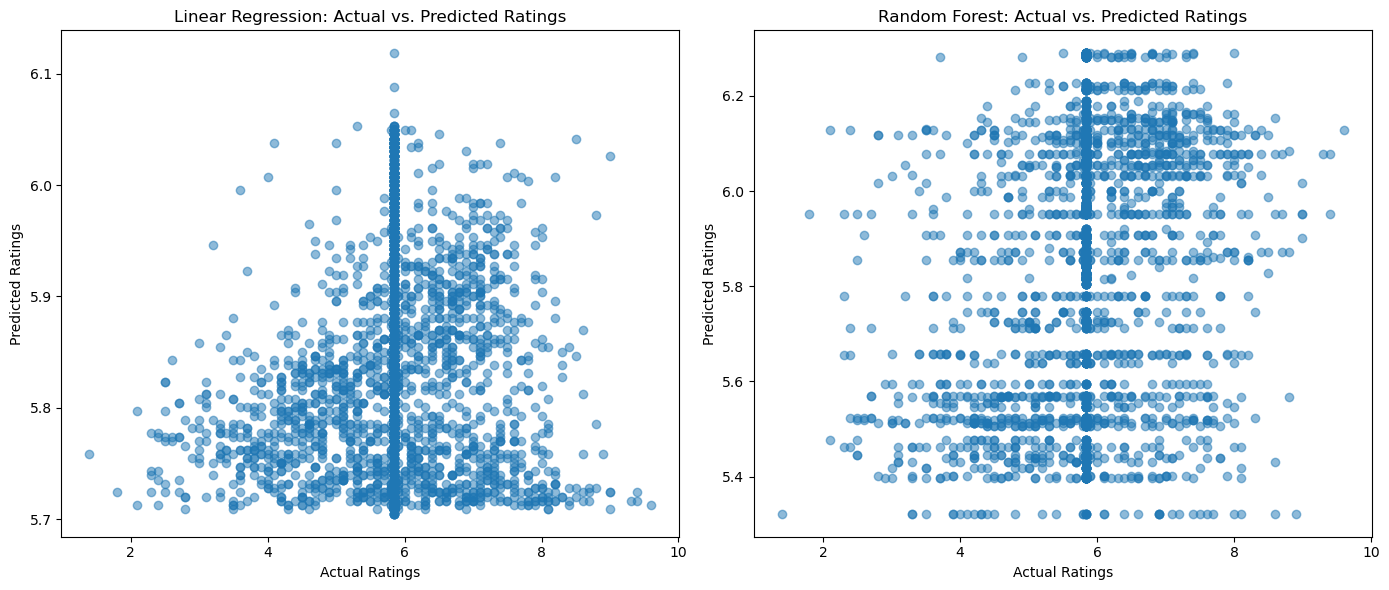

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Linear Regression: Actual vs. Predicted Ratings')

# Scatter plot of actual vs. predicted ratings for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest: Actual vs. Predicted Ratings')

plt.tight_layout()
plt.show()